# GRIPS TASK 1 SOLUTION 

# LINEAR REGRESSION MODEL (HOURS VS SCORES)

# NAME: SPARSH AGARWAL
   

In [1]:
import numpy as np

In [4]:
#importing all the necessary python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sl
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error 

In [5]:
#importing the data here
inp_data= pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')


In [6]:
inp_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
#here we are doing Explorative Data Analysis on the given dataset 

In [8]:
inp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
inp_data.describe()
#giving basic central tendenancy values such as mean,median and mode

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
inp_data.isnull == True

False

Text(0, 0.5, 'Scores')

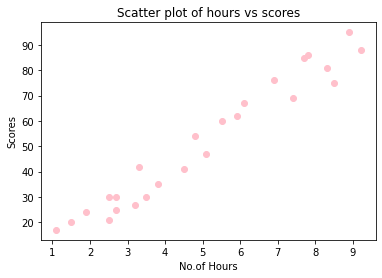

In [14]:
#plotting a scatter plot

plt.scatter(inp_data['Hours'],inp_data['Scores'], c='pink')
plt.title('Scatter plot of hours vs scores')
plt.xlabel('No.of Hours')
plt.ylabel('Scores')


<AxesSubplot:xlabel='Hours'>

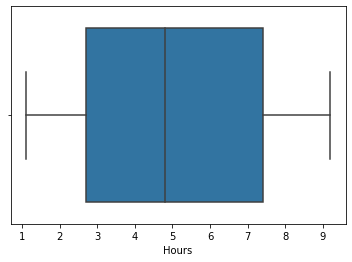

In [17]:
#plotting a box plot for hours
sns.boxplot(x=inp_data['Hours'])

<AxesSubplot:xlabel='Scores'>

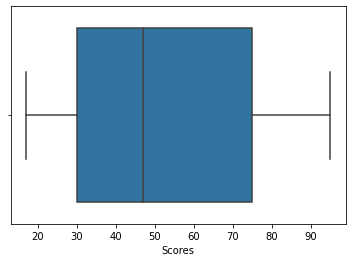

In [18]:
#plotting a box plot for score
sns.boxplot(x=inp_data['Scores'])

In [19]:
#splitting the data set into train and test data 
#train is 80% of the total data and the remaining 20% data is test data


In [44]:
X=inp_data.iloc[:, :-1].values
#importing column1 through indexing since we have the raw data
Y=inp_data.iloc[:,1].values
#importing column2 through indexing since we have the raw data
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [45]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, train_size=0.8, random_state=1)

In [23]:
#now using linear regression model from sklearn

In [46]:
lr= LinearRegression()
model=lr.fit(X_train,Y_train)

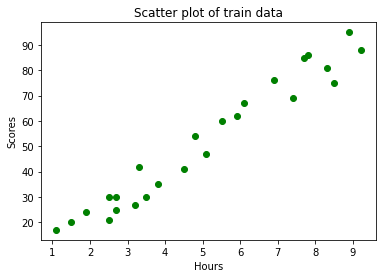

In [54]:
#plotting train data

plt.scatter(X,Y,c='green')
plt.title('Scatter plot of train data')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

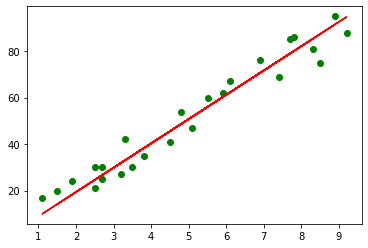

In [55]:
#plot with a regression line

reg_line= lr.coef_*X+ lr.intercept_
plt.plot(X,reg_line,c='red')
plt.scatter(X,Y,c='green')

In [57]:
#making the predictions on test data using predict function of linear regression
Y_prediction= lr.predict(X_test)

In [58]:
#printing test dataset
print(X_test)

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]]


In [61]:
#comparing the actual and predicted values for y test data
comparison= pd.DataFrame({'Actual_value': Y_test, 'Predicted_value': Y_prediction})

In [62]:
comparison

,Actual_value,Predicted_value
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


<AxesSubplot:>

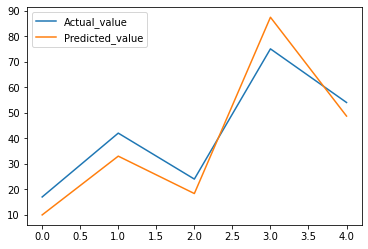

In [63]:
comparison.plot()

In [64]:
#calculating the score for no of hours given as input by the user

In [78]:
#here we are taking the number of hours as input from the user and converting it into a 2D array using .array and .reshape

inp_hours= input("Enter the number of hours:")
arr= np.array(inp_hours)
arr= arr.reshape(-1,1)
inp_prediction=lr.predict(arr)
print("The number of hours = {}".format(inp_hours))
print("The score for given hours of study = {}".format(inp_prediction))


Enter the number of hours:12
The number of hours = 12
The score for given hours of study = [123.99634219]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [82]:
#finally printing the error mean absolute percentage error

print('MAPE=',mean_absolute_percentage_error(Y_test,Y_prediction))

MAPE= 0.22554364317064085
